<a href="https://colab.research.google.com/github/pmassat/bigearthhacks20/blob/master/Camp_Fire_recovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Camp Fire recovery data analysis
Main purpose: identify metrics of the recovery process

## Census data
https://www.census.gov/data/developers/data-sets.html

## Packages

### For Colab only

### Package importation

In [1]:
#@title Import necessary modules
import requests, urllib
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import datetime as dt

import cufflinks as cf
import chart_studio
import chart_studio.plotly as py
import plotly
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.express as px

import censusdata

In [2]:
chart_studio.tools.set_credentials_file(username='pmassat', api_key='C0Zh1AFRvhgkavWOJqwC')

### US package test 
Unnecessary when working with the ```censusdata``` package

## Old work

### Paradise Quickfacts

In [0]:
#@title Import and display csv data directly from the census.gov website
Paradise_Quickfacts = pd.read_csv("https://www.census.gov/quickfacts/fact/csv/paradisetowncalifornia/PST045218")

# Output the result of this importation
Paradise_Quickfacts
# Shows the same result as on the following webpage:
# https://www.census.gov/quickfacts/fact/table/paradisetowncalifornia/PST045218

,Fact,Fact Note,"Paradise town, California","Value Note for Paradise town, California"
0,"Population estimates, July 1, 2019, (V2019)",NaN,NaN,NaN
1,"Population estimates, July 1, 2018, (V2018)",NaN,"26,800",NaN
2,"Population estimates base, April 1, 2010, (V2...",NaN,NaN,NaN
3,"Population estimates base, April 1, 2010, (V2...",NaN,"26,199",NaN
4,"Population, percent change - April 1, 2010 (es...",NaN,NaN,NaN
...,...,...,...,...
81,N,Data for this geographic area cannot be displa...,NaN,NaN
82,NaN,Not available,NaN,NaN
83,S,Suppressed; does not meet publication standards,NaN,NaN
84,X,Not applicable,NaN,NaN


In [0]:
Paradise_Quickfacts.columns
len(Paradise_Quickfacts)

86

### Poverty level
From https://data.chhs.ca.gov/dataset/poverty-rate-by-california-regions

In [0]:
cal_poverty = pd.read_excel("https://data.chhs.ca.gov/dataset/4ea80791-c308-4026-8a94-0e9070b53929/resource/2a917738-fdbb-4769-b5bf-277b1ee18eea/download/hci_povertyrate_200fpl_754_ca_re_co_cd_pl_puma_ct_20112015_20122016_total2018-10-01-ada.xlsx")
cal_poverty

,ind_id,ind_definition,reportyear,race_eth_code,race_eth_name,geotype,geotypevalue,geoname,county_name,county_fips,region_name,region_code,strata_one_code,strata_one_name,strata_two_code,strata_two_name,numerator,denominator,estimate,LL_95CI,UL_95CI,SE,RSE,CA_decile,CA_RR,version
0,754,"Overall, Concentrated, and Child (under 18 yea...",2011-2015,7,Multiple,CA,6,California,NaN,NaN,NaN,NaN,3,Overall,NaN,NaN,307749,1042924,29.508286,28.918003,30.098569,0.301165,1.020611,NaN,1.000000,Wed Oct 03 10:12:53 2018
1,754,"Overall, Concentrated, and Child (under 18 yea...",2011-2015,1,AIAN,CA,6,California,NaN,NaN,NaN,NaN,3,Overall,NaN,NaN,60309,136280,44.253742,42.160649,46.346836,1.067905,2.413140,NaN,1.000000,Wed Oct 03 10:12:53 2018
2,754,"Overall, Concentrated, and Child (under 18 yea...",2011-2015,2,Asian,CA,6,California,NaN,NaN,NaN,NaN,3,Overall,NaN,NaN,1365258,5117510,26.678170,26.362390,26.993949,0.161112,0.603909,NaN,1.000000,Wed Oct 03 10:12:53 2018
3,754,"Overall, Concentrated, and Child (under 18 yea...",2011-2015,4,Latino,CA,6,California,NaN,NaN,NaN,NaN,3,Overall,NaN,NaN,7537237,14494492,52.000698,51.659380,52.342016,0.174142,0.334884,NaN,1.000000,Wed Oct 03 10:12:53 2018
4,754,"Overall, Concentrated, and Child (under 18 yea...",2011-2015,8,Other,CA,6,California,NaN,NaN,NaN,NaN,3,Overall,NaN,NaN,29496,82902,35.579359,33.306869,37.851849,1.159434,3.258725,NaN,1.000000,Wed Oct 03 10:12:53 2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32000,754,"Overall, Concentrated, and Child (under 18 yea...",2012-2016,2,Asian,RE,14,Southern California,NaN,NaN,Southern California,14.0,1,Child,NaN,NaN,120632,412238,29.262707,28.296737,30.228678,0.492842,1.684198,NaN,1.043436,Mon Oct 01 11:10:59 2018
32001,754,"Overall, Concentrated, and Child (under 18 yea...",2012-2016,7,Multiple,RE,14,Southern California,NaN,NaN,Southern California,14.0,1,Child,NaN,NaN,44462,169723,26.196803,24.376319,28.017287,0.928818,3.545541,NaN,0.929269,Mon Oct 01 11:10:59 2018
32002,754,"Overall, Concentrated, and Child (under 18 yea...",2012-2016,4,Latino,RE,14,Southern California,NaN,NaN,Southern California,14.0,1,Child,NaN,NaN,1641783,2658463,61.756850,61.278006,62.235693,0.244308,0.395597,NaN,1.007133,Mon Oct 01 11:10:59 2018
32003,754,"Overall, Concentrated, and Child (under 18 yea...",2012-2016,1,AIAN,RE,14,Southern California,NaN,NaN,Southern California,14.0,1,Child,NaN,NaN,4154,8934,46.496530,38.743778,54.249283,3.955486,8.507056,NaN,0.866243,Mon Oct 01 11:10:59 2018


In [0]:
cal_poverty.county_name.unique()

array([nan, 'Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange',
       'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
       'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne',
       'Ventura', 'Yolo', 'Yuba'], dtype=object)

In [0]:
butte_poverty = 

### California Open Data API

In [0]:
#@title This is an attempt at connecting to the California Open Data API (ignore)
# It is not necessary for the following as of 2020-05-14
url = 'https://data.ca.gov/api/3/action/datastore_search?resource_id=b4bc4656-7866-420f-8d87-4eda4c9996ed&limit=5&q=title:jones'  
r = requests.get(url)
fileobj = urllib.request.urlopen(url)
print(fileobj.read())
r.text

b'{"help": "https://data.ca.gov/api/3/action/help_show?name=datastore_search", "success": true, "result": {"include_total": true, "resource_id": "b4bc4656-7866-420f-8d87-4eda4c9996ed", "fields": [{"type": "int", "id": "_id"}, {"type": "text", "id": "Area Type"}, {"type": "text", "id": "Area Name"}, {"type": "text", "id": "Date"}, {"type": "text", "id": "Year"}, {"type": "text", "id": "Month"}, {"type": "text", "id": "Seasonally Adjusted (Y/N)"}, {"type": "text", "id": "Status (Preliminary / Final)"}, {"type": "text", "id": "Labor Force"}, {"type": "text", "id": "Employment"}, {"type": "text", "id": "Unemployment"}, {"type": "text", "id": "Unemployment Rate"}, {"type": "float", "id": "rank"}], "records_format": "objects", "q": "title:jones", "records": [], "limit": 5, "_links": {"start": "/api/3/action/datastore_search?q=title%3Ajones&limit=5&resource_id=b4bc4656-7866-420f-8d87-4eda4c9996ed", "next": "/api/3/action/datastore_search?q=title%3Ajones&offset=5&limit=5&resource_id=b4bc4656-7

'{"help": "https://data.ca.gov/api/3/action/help_show?name=datastore_search", "success": true, "result": {"include_total": true, "resource_id": "b4bc4656-7866-420f-8d87-4eda4c9996ed", "fields": [{"type": "int", "id": "_id"}, {"type": "text", "id": "Area Type"}, {"type": "text", "id": "Area Name"}, {"type": "text", "id": "Date"}, {"type": "text", "id": "Year"}, {"type": "text", "id": "Month"}, {"type": "text", "id": "Seasonally Adjusted (Y/N)"}, {"type": "text", "id": "Status (Preliminary / Final)"}, {"type": "text", "id": "Labor Force"}, {"type": "text", "id": "Employment"}, {"type": "text", "id": "Unemployment"}, {"type": "text", "id": "Unemployment Rate"}, {"type": "float", "id": "rank"}], "records_format": "objects", "q": "title:jones", "records": [], "limit": 5, "_links": {"start": "/api/3/action/datastore_search?q=title%3Ajones&limit=5&resource_id=b4bc4656-7866-420f-8d87-4eda4c9996ed", "next": "/api/3/action/datastore_search?q=title%3Ajones&offset=5&limit=5&resource_id=b4bc4656-78

### ACS Economic Census API

In [0]:
#@title Connect to API
eco17_req = requests.get("https://api.census.gov/data/2017/ecnbasic")
print(eco17_req) # if it outputs <Response [200]>, that means "successful connection"

<Response [200]>


In [0]:
#@title Print API headers as string
eco17txt = eco17_req.text
eco17txt

'{\n  "@context": "https://project-open-data.cio.gov/v1.1/schema/catalog.jsonld",\n  "@id": "https://api.census.gov/data/2017/ecnbasic.json",\n  "@type": "dcat:Catalog",\n  "conformsTo": "https://project-open-data.cio.gov/v1.1/schema",\n  "describedBy": "https://project-open-data.cio.gov/v1.1/schema/catalog.json",\n  "dataset": [\n    {\n      "c_vintage": 2017,\n      "c_dataset": [\n        "ecnbasic"\n      ],\n      "c_geographyLink": "https://api.census.gov/data/2017/ecnbasic/geography.json",\n      "c_variablesLink": "https://api.census.gov/data/2017/ecnbasic/variables.json",\n      "c_tagsLink": "https://api.census.gov/data/2017/ecnbasic/tags.json",\n      "c_examplesLink": "https://api.census.gov/data/2017/ecnbasic/examples.json",\n      "c_groupsLink": "https://api.census.gov/data/2017/ecnbasic/groups.json",\n      "c_valuesLink": "https://api.census.gov/data/2017/ecnbasic/values.json",\n      "c_documentationLink": "https://www.census.gov/developer/",\n      "c_isAggregate": 

In [0]:
#@title Parse API headers as JSON 
eco17dict = json.loads(eco17txt)
print(json.dumps(eco17dict, indent=4))

{
    "@context": "https://project-open-data.cio.gov/v1.1/schema/catalog.jsonld",
    "@id": "https://api.census.gov/data/2017/ecnbasic.json",
    "@type": "dcat:Catalog",
    "conformsTo": "https://project-open-data.cio.gov/v1.1/schema",
    "describedBy": "https://project-open-data.cio.gov/v1.1/schema/catalog.json",
    "dataset": [
        {
            "c_vintage": 2017,
            "c_dataset": [
                "ecnbasic"
            ],
            "c_geographyLink": "https://api.census.gov/data/2017/ecnbasic/geography.json",
            "c_variablesLink": "https://api.census.gov/data/2017/ecnbasic/variables.json",
            "c_tagsLink": "https://api.census.gov/data/2017/ecnbasic/tags.json",
            "c_examplesLink": "https://api.census.gov/data/2017/ecnbasic/examples.json",
            "c_groupsLink": "https://api.census.gov/data/2017/ecnbasic/groups.json",
            "c_valuesLink": "https://api.census.gov/data/2017/ecnbasic/values.json",
            "c_documentationLin

### 2019 Population estimates Census API


In [0]:
 test = json.loads(requests.get(f"https://api.census.gov/data/2019/pep/population/variables/DATE_CODE.json").text)
 print(json.dumps(test, indent=4))

{
    "name": "DATE_CODE",
    "label": "Estimate Date",
    "required": "default displayed",
    "predicateType": "int",
    "group": "N/A",
    "limit": 0,
    "values": {
        "item": {
            "1": "April 1, 2010 Census population or housing unit count",
            "2": "April 1, 2010 population or housing unit estimates base",
            "3": "July 1, 2010 population or housing unit estimate",
            "4": "July 1, 2011 population or housing unit estimate",
            "5": "July 1, 2012 population or housing unit estimate",
            "6": "July 1, 2013 population or housing unit estimate",
            "7": "July 1, 2014 population or housing unit estimate",
            "8": "July 1, 2015 population or housing unit estimate",
            "9": "July 1, 2016 population or housing unit estimate",
            "10": "July 1, 2017 population or housing unit estimate",
            "11": "July 1, 2018 population or housing unit estimate",
            "12": "July 1, 2019 pop

As seen above the data of each year includes that of the previous years, hence it is only necessary to include the latest year's data. However, the estimates are made only once a year.

In [0]:
date_str = "DATE_"
date_code_str = "DATE_CODE"
gid_str = "GEO_ID?get=NAME"
gn_str = "GEONAME"

# define the strings used to identify the variables in the API, 
# since these string changed across the years
year_var = pd.DataFrame([[date_str, gn_str], [date_code_str, gn_str], [date_code_str, gid_str]],
                        index=range(17,20), columns=["date_var", "geo_var"])

year_var["date_var"][17]
year_var

,date_var,geo_var
17,DATE_,GEONAME
18,DATE_CODE,GEONAME
19,DATE_CODE,GEO_ID?get=NAME


In [0]:
#@title Connect to Census Population API { form-width: "40%" }
pep_req = {}
year_range = range(17,19)

for year in [19]:
  date_var = year_var["date_var"][year]
  geo_var = "GEO_ID"
  api_url = f"https://api.census.gov/data/20{year}/pep/population?"\
  f"get=POP,{date_var}&{geo_var}=*&for=county:*&in=state:06"
  # Send call to API
  pep_req[year] = requests.get(api_url)
  print(pep_req[year]) # <Response [200]> means "successful connection"

<Response [200]>


In [0]:
pep_req[19].text

'[["POP","DATE_CODE","GEO_ID","state","county"],\n["255793","1","0500000US06047","06","047"],\n["255796","2","0500000US06047","06","047"],\n["256721","3","0500000US06047","06","047"],\n["259297","4","0500000US06047","06","047"],\n["260867","5","0500000US06047","06","047"],\n["262026","6","0500000US06047","06","047"],\n["264419","7","0500000US06047","06","047"],\n["266353","8","0500000US06047","06","047"],\n["267628","9","0500000US06047","06","047"],\n["271096","10","0500000US06047","06","047"],\n["274151","11","0500000US06047","06","047"],\n["277680","12","0500000US06047","06","047"],\n["64665","1","0500000US06033","06","033"],\n["64662","2","0500000US06033","06","033"],\n["64735","3","0500000US06033","06","033"],\n["64251","4","0500000US06033","06","033"],\n["63954","5","0500000US06033","06","033"],\n["63796","6","0500000US06033","06","033"],\n["64044","7","0500000US06033","06","033"],\n["64260","8","0500000US06033","06","033"],\n["63903","9","0500000US06033","06","033"],\n["64111","1

In [0]:
#@title  Create a population dataframe for each year { form-width: "20%" }
#@markdown create dictionary that will hold each dataframe as an entry
pop_df_dict = {}

# loop over the years, since each dataset corresponds to one year
for year in year_range:
  pop_df_dict[year] = pd.read_json(pep_req[year].text)# convert json data to dataframe

  # use the first data row as header
  pop_df_dict[year].rename(columns=pop_df_dict[year].iloc[0], inplace=True)# 
  pop_df_dict[year].drop([0], inplace=True)# then remove first row

  # create columns with information about the date of the data
  date_var = year_var["date_var"][year]
  pop_df_dict[year]["year"] = f"20{year}"
  pop_df_dict[year]["timestamp"] = pd.to_datetime(pop_df_dict[year]["year"] + "-" 
                                                  + pop_df_dict[year][date_var])
print(type(pop_df_dict[year]["timestamp"].iloc[0]))
print(pop_df_dict[year])

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
         POP DATE_CODE                     GEONAME  ... county  year  timestamp
1    1510271         1  Alameda County, California  ...    001  2018 2018-01-01
2    1510258         2  Alameda County, California  ...    001  2018 2018-02-01
3    1513043         3  Alameda County, California  ...    001  2018 2018-03-01
4    1530998         4  Alameda County, California  ...    001  2018 2018-04-01
5    1554138         5  Alameda County, California  ...    001  2018 2018-05-01
..       ...       ...                         ...  ...    ...   ...        ...
634    73562         7     Yuba County, California  ...    115  2018 2018-07-01
635    74083         8     Yuba County, California  ...    115  2018 2018-08-01
636    75002         9     Yuba County, California  ...    115  2018 2018-09-01
637    76775        10     Yuba County, California  ...    115  2018 2018-10-01
638    78041        11     Yuba County, California  ...    115  2018 

In [0]:
pop_df_dict[17].rename(columns={"DATE_": "DATE_CODE"}, inplace=True)

In [0]:
pop_df = pd.concat([pop_df_dict[year] for year in year_range])
# [year][pop_df[year][3]=='007']
pop_df[pop_df.GEONAME=="Sonoma County, California"]

,POP,DATE_CODE,GEONAME,state,county,year,timestamp
487,483878,1,"Sonoma County, California",06,097,2017,2017-01-01
488,483870,2,"Sonoma County, California",06,097,2017,2017-02-01
489,484827,3,"Sonoma County, California",06,097,2017,2017-03-01
490,487822,4,"Sonoma County, California",06,097,2017,2017-04-01
491,490740,5,"Sonoma County, California",06,097,2017,2017-05-01
492,495007,6,"Sonoma County, California",06,097,2017,2017-06-01
493,499563,7,"Sonoma County, California",06,097,2017,2017-07-01
494,502096,8,"Sonoma County, California",06,097,2017,2017-08-01
495,503833,9,"Sonoma County, California",06,097,2017,2017-09-01
496,504217,10,"Sonoma County, California",06,097,2017,2017-10-01


In [0]:
#@title
# Butte county is #007 in California 
pop_butte = pop_df[pop_df.county=='007']
pop_sonoma = pop_df[pop_df.GEONAME=="Sonoma County, California"]
pop_butte

,POP,DATE_CODE,GEONAME,state,county,year,timestamp
92,220000,1,"Butte County, California",06,007,2017,2017-01-01
93,220002,2,"Butte County, California",06,007,2017,2017-02-01
94,219957,3,"Butte County, California",06,007,2017,2017-03-01
95,220003,4,"Butte County, California",06,007,2017,2017-04-01
96,220969,5,"Butte County, California",06,007,2017,2017-05-01
97,221768,6,"Butte County, California",06,007,2017,2017-06-01
98,223629,7,"Butte County, California",06,007,2017,2017-07-01
99,224818,8,"Butte County, California",06,007,2017,2017-08-01
100,226525,9,"Butte County, California",06,007,2017,2017-09-01
101,229294,10,"Butte County, California",06,007,2017,2017-10-01


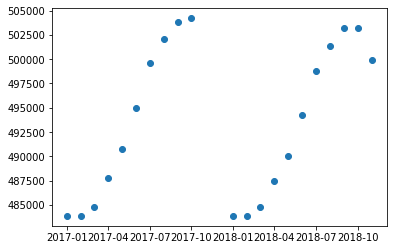

In [0]:
plt.figure()
plt.plot(pop_sonoma["timestamp"], pop_sonoma["POP"].astype(int),'o')

## ACS 5 years
Using the censusdata Python package.

In [6]:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.precision', 2)
popID = 'B01003'
housingID = 'B25001'
unempID = 'S2301_C04'

### Search fields
The ``` field ``` argument of the ```censusdata.search()``` function takes values from any of the column names available at https://api.census.gov/data/2018/acs/acs5/subject/variables.html and in the following json file:

In [4]:
search_vars = pd.read_json('https://api.census.gov/data/2018/acs/acs5/subject/variables.json', orient='columns')
search_vars.variables

AIANHH    {'label': 'Geography', 'group': 'N/A', 'limit'...
AIHHTL    {'label': 'Geography', 'group': 'N/A', 'limit'...
AIRES     {'label': 'Geography', 'group': 'N/A', 'limit'...
ANRC      {'label': 'Geography', 'group': 'N/A', 'limit'...
CBSA      {'label': 'Geography', 'group': 'N/A', 'limit'...
                                ...                        
UA        {'label': 'Geography', 'group': 'N/A', 'limit'...
ZCTA      {'label': 'Geography', 'group': 'N/A', 'limit'...
for       {'label': 'Census API FIPS 'for' clause', 'con...
in        {'label': 'Census API FIPS 'in' clause', 'conc...
ucgid     {'label': 'Uniform Census Geography Identifier...
Name: variables, Length: 18821, dtype: object

In [5]:
# Details of the content of one of the variables
search_vars.variables['for']

{'label': "Census API FIPS 'for' clause",
 'concept': 'Census API Geography Specification',
 'predicateType': 'fips-for',
 'group': 'N/A',
 'limit': 0,
 'predicateOnly': True}

In [6]:
# The keys of each variable dictionary are the possible values 
# of the ```field``` argument of the ```censusdata.search()``` function
field_dict = search_vars.variables['for'].keys()
field_dict

dict_keys(['label', 'concept', 'predicateType', 'group', 'limit', 'predicateOnly'])

### Search for unemployment rate data

In [17]:
year = 2018
[tup for tup in censusdata.search('acs5', year, 'concept', 'employment status', tabletype='subject') 
if tup in censusdata.search('acs5', year, 'label', 'unemployment rate', tabletype='subject')]

KeyboardInterrupt: 

In [24]:
censusdata.printtable(censusdata.censustable('acs5', 2017, unempID))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
S2301_C04_001E | EMPLOYMENT STATUS              | !! !! Estimate Unemployment rate Population 16 years and | float
S2301_C04_002E | EMPLOYMENT STATUS              | !! !! !! !! Estimate Unemployment rate Population 16 yea | float
S2301_C04_003E | EMPLOYMENT STATUS              | !! !! !! !! Estimate Unemployment rate Population 16 yea | float
S2301_C04_004E | EMPLOYMENT STATUS              | !! !! !! !! Estimate Unemployment rate Population 16 yea | float
S2301_C04_005E | EMPLOYMENT STATUS              | !! !! !! !! Estimate Unemployment rate Population 16 yea | float
S2301_C04_006E | EMPLOYMENT STATUS              | !! !! !! !! Estimate Unemployment rate Population 16 yea | float
S2301_C04_007E | EMPLOYMENT STATUS              | !! !! !! !! Estimate Unemployme

### Search for population data

In [13]:
censusdata.search('acs5', 2018, 'concept', 'total POPULATION', tabletype='detail')
# censusdata.search('acs5', 2018, 'label', 'total population', tabletype='subject')

[('B01003_001E', 'TOTAL POPULATION', 'Estimate!!Total'),
 ('B25008_001E',
  'TOTAL POPULATION IN OCCUPIED HOUSING UNITS BY TENURE',
  'Estimate!!Total'),
 ('B25008_002E',
  'TOTAL POPULATION IN OCCUPIED HOUSING UNITS BY TENURE',
  'Estimate!!Total!!Owner occupied'),
 ('B25008_003E',
  'TOTAL POPULATION IN OCCUPIED HOUSING UNITS BY TENURE',
  'Estimate!!Total!!Renter occupied'),
 ('B25026_001E',
  'TOTAL POPULATION IN OCCUPIED HOUSING UNITS BY TENURE BY YEAR HOUSEHOLDER MOVED INTO UNIT',
  'Estimate!!Total population in occupied housing units'),
 ('B25026_002E',
  'TOTAL POPULATION IN OCCUPIED HOUSING UNITS BY TENURE BY YEAR HOUSEHOLDER MOVED INTO UNIT',
  'Estimate!!Total population in occupied housing units!!Owner occupied'),
 ('B25026_003E',
  'TOTAL POPULATION IN OCCUPIED HOUSING UNITS BY TENURE BY YEAR HOUSEHOLDER MOVED INTO UNIT',
  'Estimate!!Total population in occupied housing units!!Owner occupied!!Moved in 2017 or later'),
 ('B25026_004E',
  'TOTAL POPULATION IN OCCUPIED HOUS

In [22]:
censusdata.printtable(censusdata.censustable('acs5', 2018, popID))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B01003_001E  | TOTAL POPULATION               | !! Estimate Total                                        | int  
-------------------------------------------------------------------------------------------------------------------


### Search for housing units

In [16]:
censusdata.search('acs5', 2018, 'concept', 'HOUSING UNITS', tabletype='detail')
# censusdata.search('acs5', 2018, 'label', 'total population', tabletype='subject')

[('B00002_001E', 'UNWEIGHTED SAMPLE HOUSING UNITS', 'Estimate!!Total'),
 ('B25001_001E', 'HOUSING UNITS', 'Estimate!!Total'),
 ('B25008_001E',
  'TOTAL POPULATION IN OCCUPIED HOUSING UNITS BY TENURE',
  'Estimate!!Total'),
 ('B25008_002E',
  'TOTAL POPULATION IN OCCUPIED HOUSING UNITS BY TENURE',
  'Estimate!!Total!!Owner occupied'),
 ('B25008_003E',
  'TOTAL POPULATION IN OCCUPIED HOUSING UNITS BY TENURE',
  'Estimate!!Total!!Renter occupied'),
 ('B25010_001E',
  'AVERAGE HOUSEHOLD SIZE OF OCCUPIED HOUSING UNITS BY TENURE',
  'Estimate!!Total'),
 ('B25010_002E',
  'AVERAGE HOUSEHOLD SIZE OF OCCUPIED HOUSING UNITS BY TENURE',
  'Estimate!!Total!!Owner occupied'),
 ('B25010_003E',
  'AVERAGE HOUSEHOLD SIZE OF OCCUPIED HOUSING UNITS BY TENURE',
  'Estimate!!Total!!Renter occupied'),
 ('B25026_001E',
  'TOTAL POPULATION IN OCCUPIED HOUSING UNITS BY TENURE BY YEAR HOUSEHOLDER MOVED INTO UNIT',
  'Estimate!!Total population in occupied housing units'),
 ('B25026_002E',
  'TOTAL POPULATION I

In [23]:
censusdata.printtable(censusdata.censustable('acs5', 2018, housingID))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B25001_001E  | HOUSING UNITS                  | !! Estimate Total                                        | int  
-------------------------------------------------------------------------------------------------------------------


### Show FIPS codes for geographies of interest

In [0]:
censusdata.geographies(censusdata.censusgeo([('state', '06'), ('county', '*')]), 'acs5', 2018)

{'Alameda County, California': censusgeo((('state', '06'), ('county', '001'))),
 'Alpine County, California': censusgeo((('state', '06'), ('county', '003'))),
 'Amador County, California': censusgeo((('state', '06'), ('county', '005'))),
 'Butte County, California': censusgeo((('state', '06'), ('county', '007'))),
 'Calaveras County, California': censusgeo((('state', '06'), ('county', '009'))),
 'Colusa County, California': censusgeo((('state', '06'), ('county', '011'))),
 'Contra Costa County, California': censusgeo((('state', '06'), ('county', '013'))),
 'Del Norte County, California': censusgeo((('state', '06'), ('county', '015'))),
 'El Dorado County, California': censusgeo((('state', '06'), ('county', '017'))),
 'Fresno County, California': censusgeo((('state', '06'), ('county', '019'))),
 'Glenn County, California': censusgeo((('state', '06'), ('county', '021'))),
 'Humboldt County, California': censusgeo((('state', '06'), ('county', '023'))),
 'Imperial County, California': cens

### Import relevant tables

In [106]:
year_range = range(2009,2019)
cal_dict_d = {}
pop_tab = f'{popID}_001E'
housing_tab = f'{housingID}_001E'
for year in year_range:
#     year = 2000 + yr
    cal_details = censusdata.download('acs5', year,
                                 censusdata.censusgeo([('state', '06'), ('county', '*')]),
                                 [pop_tab, housing_tab], tabletype='detail')
#                                  ['B00001_001E'], tabletype='detail')
    cal_details.rename(columns={pop_tab:"Population", housing_tab:"Housing units"}, inplace=True)
    cal_dict_d[year] = cal_details
#     cal_dict_d[year]["Timestamp"] = pd.Timestamp(year=year, month=1, day=1)
#     print(f"{year}: done.")
cal_dict_d[year].describe()

,Population,Housing units
count,5.80e+01,5.80e+01
mean,6.75e+05,2.43e+05
std,1.47e+06,5.13e+05
min,1.15e+03,1.73e+03
25%,4.74e+04,2.49e+04
50%,1.83e+05,7.80e+04
75%,6.84e+05,2.33e+05
max,1.01e+07,3.52e+06


In [10]:
# for year in year_range:
cal_dict_d[year].index[0].name

'Lake County, California'

In [11]:
cal_dict_s = {}
unemp_tab = f'{unempID}_001E'
for year in year_range:
#     year = 2000 + yr
    try:
        cal_unemp = censusdata.download('acs5', year,
                                     censusdata.censusgeo([('state', '06'), ('county', '*')]),
                                     [unemp_tab], tabletype='subject')
    except ValueError:
        continue
    cal_unemp.rename(columns={unemp_tab:"Unemployment_rate"}, inplace=True)
    cal_dict_s[year] = cal_unemp
#     cal_dict_s[year]["Timestamp"] = pd.Timestamp(year=year, month=1, day=1)

cal_dict_s[year].describe()

Unexpected response (URL: https://api.census.gov/data/2009/acs5/subject?get=NAME,S2301_C04_001E&for=county:*&in=state:06): <html><head><title>Error report</title></head><body><h1>HTTP Status 404 - /data/2009/acs5/subject</h1></body></html> 


,Unemployment_rate
count,58.00
mean,7.40
std,2.62
min,3.10
25%,5.53
50%,6.80
75%,8.67
max,17.80


In [108]:
# cal_dict_s[year]["Timestamp"] = pd.Timestamp(year=year, month=1, day=1)
cal_dict_d[2009]

,Population,Housing units
"Alameda County, California: Summary level: 050, state:06> county:001",1457095,563011
"Alpine County, California: Summary level: 050, state:06> county:003",1153,1752
"Amador County, California: Summary level: 050, state:06> county:005",38039,17238
"Butte County, California: Summary level: 050, state:06> county:007",217917,94743
"Calaveras County, California: Summary level: 050, state:06> county:009",46548,26905
"Colusa County, California: Summary level: 050, state:06> county:011",21001,7443
"Contra Costa County, California: Summary level: 050, state:06> county:013",1015571,391260
"Del Norte County, California: Summary level: 050, state:06> county:015",28729,11053
"El Dorado County, California: Summary level: 050, state:06> county:017",175941,82227
"Fresno County, California: Summary level: 050, state:06> county:019",890750,302935


In [148]:
# year_range = range(2009,2019)
# cal_metrics = pd.DataFrame()
cal_dict = {}
for year in year_range:
#     cal_dict[year] = cal_dict_d[year]
    try:
        cal_dict[year] = pd.concat([cal_dict_d[year], cal_dict_s[year]], axis=1)
    except (KeyError):
        cal_dict[year] = cal_dict_d[year].copy(deep=True)
    
    
    cal_dict[year]['County'] = cal_dict[year].index.copy(deep=True)
    cal_dict[year]['cartodb_id'] = cal_dict[year]['Population'].copy(deep=True)
    for idx in range(len(cal_dict[year])):
        try:
            cal_dict[year]['County'][idx] = cal_dict[year].index[idx].name
            cal_dict[year]['cartodb_id'][idx] = (int(cal_dict[year].index[idx].geo[1][1])+1)/2
        except AttributeError:
            break

#     cal_dict[year].set_index('County', inplace=True)
    cal_dict[year]["Timestamp"] = pd.Timestamp(year=year, month=1, day=1)
#     cal_dict[year].rename_axis("County")

In [150]:
cal_dict[2017]

,Population,Housing units,Unemployment_rate,County,cartodb_id,Timestamp
"Modoc County, California: Summary level: 050, state:06> county:049",9017,5250,7.5,"Modoc County, California",25,2017-01-01
"Merced County, California: Summary level: 050, state:06> county:047",267390,84488,14.6,"Merced County, California",24,2017-01-01
"Lake County, California: Summary level: 050, state:06> county:033",64095,35747,11.2,"Lake County, California",17,2017-01-01
"Mariposa County, California: Summary level: 050, state:06> county:043",17658,10378,10.0,"Mariposa County, California",22,2017-01-01
"Yuba County, California: Summary level: 050, state:06> county:115",74644,28225,9.9,"Yuba County, California",58,2017-01-01
"Contra Costa County, California: Summary level: 050, state:06> county:013",1123678,409117,6.9,"Contra Costa County, California",7,2017-01-01
"Inyo County, California: Summary level: 050, state:06> county:027",18195,9526,5.2,"Inyo County, California",14,2017-01-01
"Lassen County, California: Summary level: 050, state:06> county:035",31470,12749,7.5,"Lassen County, California",18,2017-01-01
"Stanislaus County, California: Summary level: 050, state:06> county:099",535684,180755,11.8,"Stanislaus County, California",50,2017-01-01
"Santa Barbara County, California: Summary level: 050, state:06> county:083",442996,155339,6.6,"Santa Barbara County, California",42,2017-01-01


In [151]:
cal_metrics = pd.concat(cal_dict, names=['Year','Censusgeo'])
# cal_metrics = cal_metrics.swaplevel('Timestamp','County')

In [152]:
cal_metrics.head()

Population  Housing units                        County  cartodb_id  Timestamp  Unemployment_rate
Year Censusgeo                                                                                                                                            
2009 Alameda County, California: Summary level: 050,...     1457095         563011    Alameda County, California           1 2009-01-01                NaN
     Alpine County, California: Summary level: 050, ...        1153           1752     Alpine County, California           2 2009-01-01                NaN
     Amador County, California: Summary level: 050, ...       38039          17238     Amador County, California           3 2009-01-01                NaN
     Butte County, California: Summary level: 050, s...      217917          94743      Butte County, California           4 2009-01-01                NaN
     Calaveras County, California: Summary level: 05...       46548          26905  Calaveras County, California           5 2009-01-01                NaN

In [153]:
if 'county_metrics' not in globals():
    county_metrics = {}
county_name = 'Alameda'
county_metrics[county_name] = cal_metrics[cal_metrics['County']==''.join([county_name,' County, California'])]
county_metrics[county_name]

,,Population,Housing units,County,cartodb_id,Timestamp,Unemployment_rate
Year,Censusgeo,,,,,,
2009,"Alameda County, California: Summary level: 050, state:06> county:001",1457095,563011,"Alameda County, California",1,2009-01-01,NaN
2010,"Alameda County, California: Summary level: 050, state:06> county:001",1477980,577538,"Alameda County, California",1,2010-01-01,8.5
2011,"Alameda County, California: Summary level: 050, state:06> county:001",1494876,580725,"Alameda County, California",1,2011-01-01,9.2
2012,"Alameda County, California: Summary level: 050, state:06> county:001",1515136,581859,"Alameda County, California",1,2012-01-01,9.9
2013,"Alameda County, California: Summary level: 050, state:06> county:001",1535248,584652,"Alameda County, California",1,2013-01-01,10.3
2014,"Alameda County, California: Summary level: 050, state:06> county:001",1559308,587071,"Alameda County, California",1,2014-01-01,9.6
2015,"Alameda County, California: Summary level: 050, state:06> county:001",1584983,589858,"Alameda County, California",1,2015-01-01,8.3
2016,"Alameda County, California: Summary level: 050, state:06> county:001",1605217,592796,"Alameda County, California",1,2016-01-01,7.1
2017,"Alameda County, California: Summary level: 050, state:06> county:001",1629615,596898,"Alameda County, California",1,2017-01-01,6.0


In [154]:
county_metrics[county_name]['Population'].index

MultiIndex([(2009, ...),
            (2010, ...),
            (2011, ...),
            (2012, ...),
            (2013, ...),
            (2014, ...),
            (2015, ...),
            (2016, ...),
            (2017, ...),
            (2018, ...)],
           names=['Year', 'Censusgeo'])

### Plot data for the chosen county

In [155]:
def create_fig(metrics_dataframe, geo_name, metrics='Population', title=None):
    data = metrics_dataframe[geo_name][metrics]

    if title is None:
        title = metrics
        
    trace0 = go.Scatter(
        x=data.index,
        y=data.values)
    
    layout = dict(title=f"{geo_name} County {title}", 
                  xaxis=dict(title='Year'), 
                  yaxis=dict(title=title))
    
    return go.Figure(trace0, layout=layout)

In [171]:
def timestamp_fig(metrics_dataframe, geo_name, metrics='Population', title=None):
    data = metrics_dataframe[geo_name]

    if title is None:
        title = metrics
        
    trace = go.Scatter(x=data['Timestamp'], y=data[metrics])
    
    layout = dict(title=f"{geo_name} County {title}", 
                  xaxis=dict(title='Year'), 
                  yaxis=dict(title=title))
    
    return go.Figure(trace, layout=layout)

In [172]:
metrics = 'Population'
data = county_metrics[county_name]
trace0 = go.Scatter(
    x=data['Timestamp'],
    y=data[metrics],
    name=f"{county_name} County {metrics}"
)
# traces = [trace0]
# layout = dict(title=f"{county_name} County population", 
#               xaxis=dict(title='Year'), 
#               yaxis=dict(title='Population'))
fig = timestamp_fig(county_metrics, county_name, metrics='Unemployment_rate', title='Unemployment Rate')
# fig = go.Figure(trace0, layout=layout)
plotly.offline.plot(fig)

'temp-plot.html'

In [161]:
pd.options.plotting.backend = "plotly"
# py.iplot(traces, layout=layout, filename='Alameda_pop')
# data.plot()
fig = px.scatter(data, x='Timestamp', y=metrics)
# fig = go.Figure(trace0, layout=layout)
# fig.show()
plotly.offline.plot(fig)

'temp-plot.html'

## Plot choropleth map

In [208]:
from urllib.request import urlopen
import json

folium_counties = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'
plotly_counties = 'https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json'
cal_counties = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/california-counties.geojson'

# this one is not in the right format
counties_json = 'https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_Counties_Generalized/FeatureServer/0?f=pjson'

with urlopen(cal_counties) as response:
    counties = json.load(response)
# print(counties)

map_year = year_range[-1]
map_data = cal_dict[map_year]
# import pandas as pd
# df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
#                    dtype={"fips": str})

# Create figure using Plotly Express
fig = px.choropleth_mapbox(map_data, geojson=counties, locations='cartodb_id', color='Unemployment_rate',
                           featureidkey='properties.cartodb_id',
                           hover_name='County', 
                           hover_data={'cartodb_id':False, 'Population':':,', 'Housing units':':,'},
                           labels={'Unemployment_rate':'Unemployment rate (%)'},
#                            color_continuous_scale="Viridis", 
                           mapbox_style="carto-positron",
                           zoom=5, center = {"lat": 36.6777, "lon": -121.6555},
                           opacity=0.5,
#                            title=f"Unemployment rate per county in California as of {map_year}"
                           )

# Create figure using Plotly Graph_objects
# fig = go.Figure(go.Choroplethmapbox(geojson=counties, locations=map_data.cartodb_id, z=map_data.Population,
#                                     featureidkey="properties.cartodb_id",
# # fig = go.Figure(go.Choroplethmapbox(geojson=counties, locations=df.fips, z=df.unemp,
# #                                     colorscale="Viridis", zmin=0, zmax=12,
#                                     marker_opacity=0.5, marker_line_width=0))
# fig.update_layout(mapbox_style="carto-positron",
#                   mapbox_zoom=3, mapbox_center = {"lat": 37.0902, "lon": -95.7129})

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()
plotly.offline.plot(fig)

'temp-plot.html'

In [192]:
map_data

,Population,Housing units,Unemployment_rate,County,cartodb_id,Timestamp
"Lake County, California: Summary level: 050, state:06> county:033",64148,35067,9.8,"Lake County, California",17,2018-01-01
"Mariposa County, California: Summary level: 050, state:06> county:043",17540,10388,8.7,"Mariposa County, California",22,2018-01-01
"Yuba County, California: Summary level: 050, state:06> county:115",75493,28370,8.4,"Yuba County, California",58,2018-01-01
"Contra Costa County, California: Summary level: 050, state:06> county:013",1133247,411338,6.1,"Contra Costa County, California",7,2018-01-01
"Lassen County, California: Summary level: 050, state:06> county:035",31185,12758,6.1,"Lassen County, California",18,2018-01-01
"Santa Barbara County, California: Summary level: 050, state:06> county:083",443738,156210,6.1,"Santa Barbara County, California",42,2018-01-01
"Sonoma County, California: Summary level: 050, state:06> county:097",501317,207631,5.1,"Sonoma County, California",49,2018-01-01
"Imperial County, California: Summary level: 050, state:06> county:025",180216,57468,15.3,"Imperial County, California",13,2018-01-01
"Mono County, California: Summary level: 050, state:06> county:051",14174,14078,3.1,"Mono County, California",26,2018-01-01
"Alameda County, California: Summary level: 050, state:06> county:001",1643700,601942,5.1,"Alameda County, California",1,2018-01-01


In [41]:
py.plot(fig, filename='counties-unemp-16')

'https://plotly.com/~pmassat/13/'

## Create dashboard

In [4]:
import dash
import dash_core_components as dcc
import dash_html_components as html

In [5]:
app = dash.Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run_server(debug=True, use_reloader=False)  # Turn off reloader if inside Jupyter

Running on http://127.0.0.1:8050/
Debugger PIN: 423-666-491
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


## Next steps as of 2020-05-26

*   Create dashboard with dash 
    - Show map
    - Enable select county
    - Show county data
*   Upload to web
